# GCC's ssc-cdi : Restoration Interface for Cateretê, v0.0.5
 
- #### To visualize outputs in real time, open the log console at: View > Show Log Console
- #### The processed data will be saved in the corresponding folder at .../proc/recons/...
- #### Questions? E-mail gcc@lnls.br

In [1]:
install_packages = False

%matplotlib widget
import matplotlib.pyplot as plt
import sscInstall, os
from sscCdi import restoration_jupyter
if install_packages:
    server = sscInstall.connect_server()
    print("The kernel will restart after installation. Please run the cell again using install_packages = False")
    sscInstall.install_jupyter(server,beamline='caterete',sscCdi='0.4.9',sscPtycho='1.0.2',sscPimega='0.4.0',sscRaft='2.0.1',sscRadon='1.0.0',sscResolution='1.2.3')
    os._exit(00) # shutdown kernel. Required to import new installed packages

## Inputs

In [2]:
n_of_threads = 32 # use 32 as standard value; should be fast enough

distance = 20 # meters

data_path        = "/ibira/lnls/beamlines/caterete/proposals/20230614/data/cdi/directbeam20022023_0001.hdf5"
# data_path        = "/ibira/lnls/beamlines/caterete/proposals/20230614/data/cdi/testlogo_026.hdf5"
empty_path       = ""
flat_path        = ""
# flat_path = "/ibira/lnls/beamlines/caterete/apps/scans/FF/2023-01-18-FF6keV.hdf5"
mask_path        = ""
subtraction_path = ""

apply_binning = False
fill_blanks = False
apply_crop = [True, 1398, 1409,1402] # if [T/F, size, center_y, center_x]. if size == 0 then the maximum possible size will be used


save_path = "/ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/restoration/" # path to output processed data

## Process Data
IMPORTANT: In the function call bellow, use empty string for paths for which you don't want to apply that specific masking element (i.e. path='')

In [3]:
processed_data, restored_full_DP = restoration_jupyter.restoration_via_interface(data_path,[n_of_threads, distance, apply_binning, apply_crop, fill_blanks,3],flat_path,empty_path,mask_path,subtraction_path, save_path)

Corrected center position: cy=1403 cx=1399
-- Calling MPI code to read /ibira/lnls/beamlines/caterete/proposals/20230614/data/cdi/directbeam20022023_0001.hdf5
	Raw data shape:  (1, 3072, 3072)
Correcting and restoring diffraction patterns... 
ssc-pimega: creating 1x2796x2796 shared array (SharedArray)


Process Process-1:
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 258, in _bootstrap
    self.run()
  File "/usr/local/lib/python3.6/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/home/ABTLUS/yuri.tonin/.local/lib/python3.6/site-packages/sscPimega/misc/misc.py", line 148, in _worker_batch_
    output[k, :, :] = image
ValueError: could not broadcast input array from shape (2797,2797) into shape (2796,2796)


ssc-pimega: 1 Images corrected within 0.22824597358703613 sec
               Shared Array creation 0.00023436546325683594 sec
	Restored data shape:  (1, 2796, 2796)
Saving data at:  /ibira/lnls/beamlines/caterete/apps/gcc-jupyter/00000000/proc/restoration/
Done!
Output data shape (1, 2796, 2796). Type: int32
Dataset size: 31.27 MBs = 0.03 GBs


## Find center: 
    - Plot with average of data to find the center of the DP. Re-run "Process Data" after this is done!

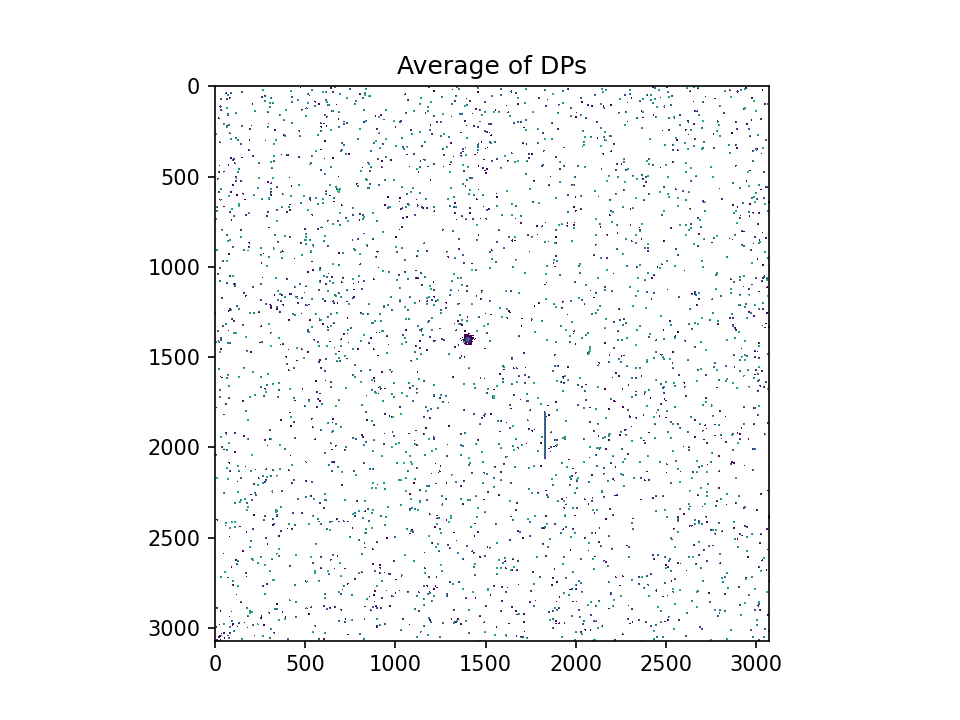

In [4]:
restoration_jupyter.plot_flipped_full_DP(restored_full_DP)

## View processed data
    - Plot containing the processed data. Use slider to scan through slices and visualize each diffraction pattern
    - ATTENTION: since "processed_data" may have up to GBs of size, plots can take a long time to load (up to a few minutes) 
    If you want to have a quick preview of the data only, select a small portion of the data using a slice, for instance, by changing "processed_data" to "processed_data[25:50]" to preview only slices 25 to 50

In [5]:
restoration_jupyter.plot_DPs_with_slider(processed_data)